In [2]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ks_2samp
#test ado

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Doll03/4IZ480/main/Data/TimeDeposit_10K.csv', sep=";")

In [4]:
dataset.Time_Deposits_Flag.value_counts()


F    9897
T     103
Name: Time_Deposits_Flag, dtype: int64

In [5]:
dataset["Customer_ID"] = dataset["Customer_ID"].astype("object")
dataset["Birth_Date"] = dataset["Birth_Date"].astype("datetime64")
dataset["Ref_Date"] = dataset["Ref_Date"].astype("datetime64")
dataset["Gender"] = dataset["Gender"].astype("category")
dataset["Marital_Status"] = dataset["Marital_Status"].astype("category")
dataset["Children_Num"] = dataset["Children_Num"].astype("int64")
dataset["Occupation_Category"] = dataset["Occupation_Category"].astype("category")
dataset["Payroll_Flag"] = dataset["Payroll_Flag"].astype("bool")
dataset["Business_Flag"] = dataset["Business_Flag"].astype("bool")
dataset["Saving_Current_Accounts_Flag"] = dataset["Saving_Current_Accounts_Flag"].astype("bool")
dataset["Investment_Products_Flag"] = dataset["Investment_Products_Flag"].astype("bool")
dataset["Insurance_Products_Flag"] = dataset["Insurance_Products_Flag"].astype("bool")
dataset["Business_Loans_Flag"] = dataset["Business_Loans_Flag"].astype("bool")
dataset["Housing_Loans_Flag"] = dataset["Housing_Loans_Flag"].astype("bool")
dataset["Consumer_Loans_Flag"] = dataset["Consumer_Loans_Flag"].astype("bool")
dataset["Credit_Cards_Flag"] = dataset["Credit_Cards_Flag"].astype("bool")
dataset["Time_Deposits_Flag2"] = [True if i == "T" else False for i in dataset['Time_Deposits_Flag']]
dataset["Time_Deposits_Flag"] = dataset["Time_Deposits_Flag2"]


In [6]:
dataset.Time_Deposits_Flag2.value_counts()


False    9897
True      103
Name: Time_Deposits_Flag2, dtype: int64

In [7]:
#Creating boolean variables 
dataset["Credit_Cards_Installments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Installments']]
dataset["Credit_Cards_Payments_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Payments_Num']]
dataset["Credit_Cards_Purchases_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Purchases_Num']]
dataset["Credit_Cards_Witrhdrawals_Flag"] = [True if i > 0 else False for i in dataset['Credit_Cards_Witrhdrawals_Num']]
dataset["Internet_Trans_Flag"] = [True if i > 0 else False for i in dataset['Internet_Trans_Num']]
dataset["Deposit_Trans_Flag"] = [True if i > 0 else False for i in dataset['Deposit_Trans_Num']]
dataset["Payment_Trans_Flag"] = [True if i > 0 else False for i in dataset['Payment_Trans_Num']]
dataset["Transfer_Trans_Flag"] = [True if i > 0 else False for i in dataset['Transfer_Trans_Num']]
dataset["Withdrawl_Trans_Flag"] = [True if i > 0 else False for i in dataset['Withdrawl_Trans_Num']]

In [9]:
#Creating a list for storing categorical features.
cat_v_list = [i for i in list (dataset.columns) if (dataset[i].dtypes in ["o", "bool"])]
cat_v_list.remove("Time_Deposits_Flag")
print(cat_v_list)


['Payroll_Flag', 'Business_Flag', 'Saving_Current_Accounts_Flag', 'Investment_Products_Flag', 'Insurance_Products_Flag', 'Business_Loans_Flag', 'Housing_Loans_Flag', 'Consumer_Loans_Flag', 'Credit_Cards_Flag', 'Time_Deposits_Flag2', 'Credit_Cards_Installments_Flag', 'Credit_Cards_Payments_Flag', 'Credit_Cards_Purchases_Flag', 'Credit_Cards_Witrhdrawals_Flag', 'Internet_Trans_Flag', 'Deposit_Trans_Flag', 'Payment_Trans_Flag', 'Transfer_Trans_Flag', 'Withdrawl_Trans_Flag']


In [10]:
#Creating a list for storing numerical features

num_v_list = [i for i in list(dataset.columns) if i not in cat_v_list]
num_v_list.remove("Time_Deposits_Flag")
print(num_v_list)

['Customer_ID', 'Gender', 'Birth_Date', 'Ref_Date', 'Marital_Status', 'Children_Num', 'Occupation_Category', 'Total_Income', 'Saving_Current_Balance', 'Investment_Products_Balance', 'Insurance_Balances', 'Business_Loans_Balance', 'Housing_Loans_Balance', 'Consumer_Loans_Balance', 'Credit_Cards_Balance', 'Branch_Trans_Num', 'ATM_Trans_Num', 'APS_Trans_Num', 'Phone_Trans_Num', 'Internet_Trans_Num', 'Deposit_Trans_Num', 'Withdrawl_Trans_Num', 'Payment_Trans_Num', 'Transfer_Trans_Num', 'Deposit_Trans_Amount', 'Withdrawl_Trans_Amount', 'Payment_Trans_Amount', 'Transfer_Trans_Amount', 'Credit_Cards_Installments', 'Credit_Cards_Payments_Num', 'Credit_Cards_Purchases_Num', 'Credit_Cards_Witrhdrawals_Num', 'Credit_Cards_Payments_Amount', 'Credit_Cards_Purchases_Amount', 'Credit_Cards_Witrhdrawals_Amount', 'Arrears_Months_Max']


In [73]:
#Creating variable Age
dataset['Age'] = dataset['Ref_Date'].dt.year - dataset['Birth_Date'].dt.year

False    0.9897
True     0.0103
Name: Time_Deposits_Flag, dtype: float64


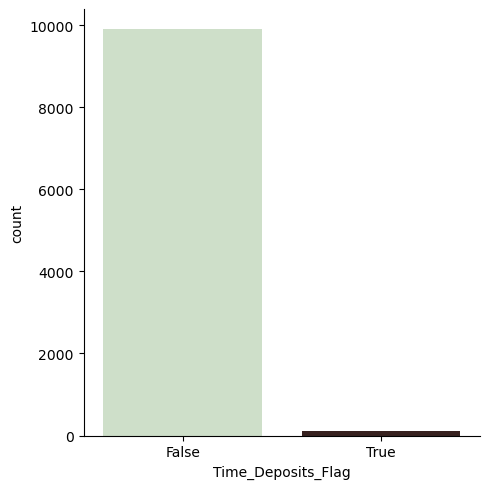

In [74]:

print(dataset["Time_Deposits_Flag"].value_counts(normalize=True))
sns.catplot(data = dataset, x = "Time_Deposits_Flag", kind = "count", palette = "ch:.79")